<a href="https://colab.research.google.com/github/BintangKalahari/ORBITKM/blob/main/TUGAS_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libary

In [ ]:
#mengimport library yang dibutuhkan dalam membangun model
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics


Load Dataset

In [ ]:
df = pd.read_csv('citrus.csv') #membaca dataet lokal
df.tail()#menampilkan 5 baris terakhir

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


In [ ]:
df.info()#menampilkan informasi umum dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df['name'].value_counts() #menampilkan jumlah data perlabel

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [ ]:
df.isnull().sum() # cek apakah ada data yang null

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

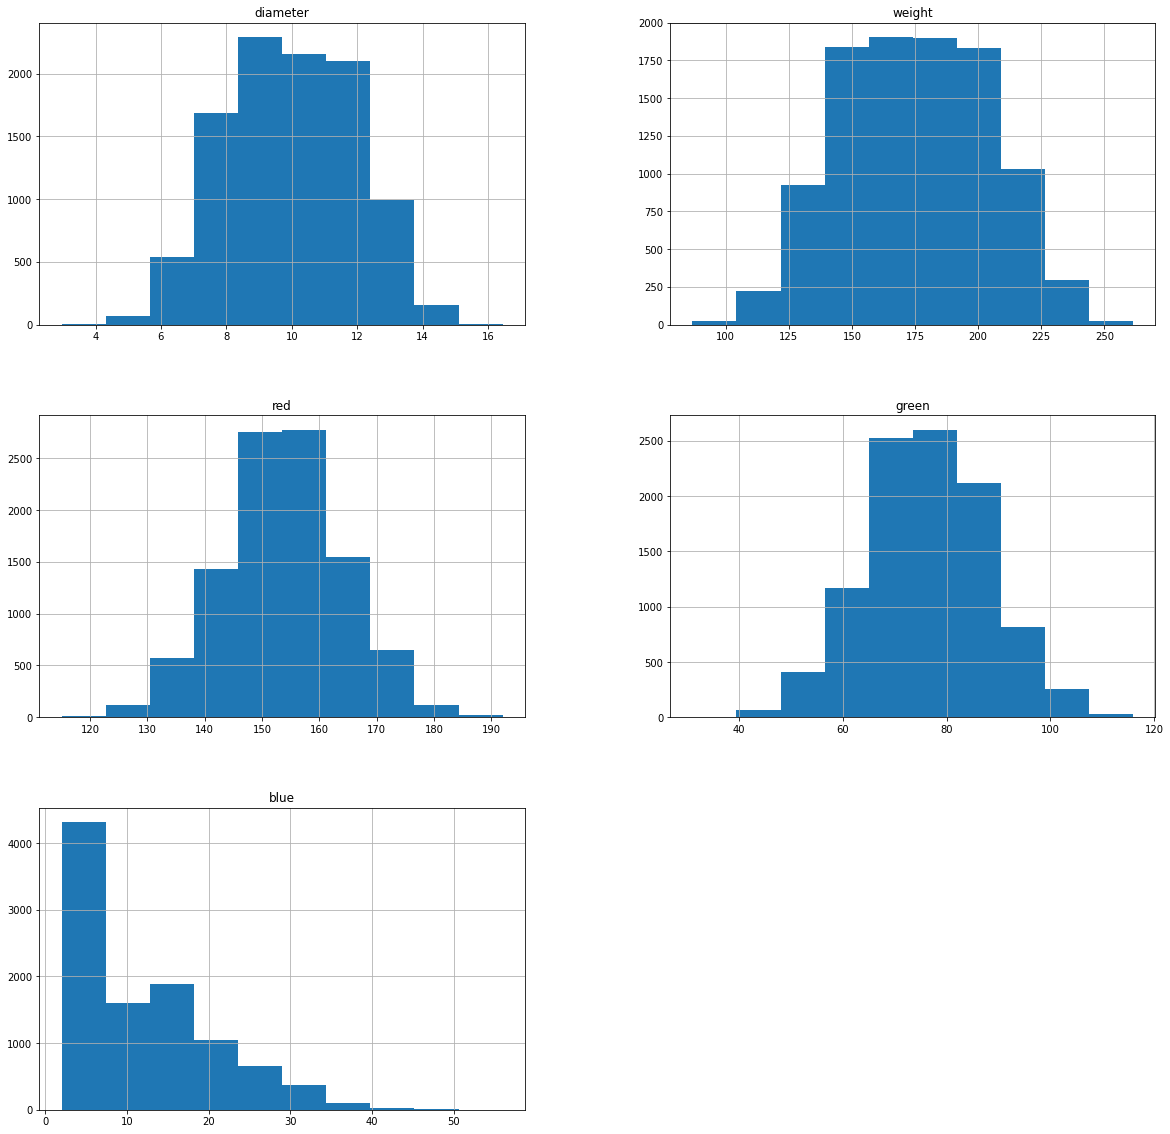

In [ ]:
p = df.hist(figsize = (20,20)) #menampilkan histrogram dari semua kolom dataset


Mengubah data categorical menjadi data numerik

In [ ]:
#mengubah label orange = 0 dan grapefruit = 1
df.name[df.name =='orange']=0
df.name[df.name == 'grapefruit']=1
dataset=df.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset #menampilkan dataset yang telah diubah

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

Pishakan atribut dan Label

In [ ]:
# pilih 5 kolom terakhir sebagai atribut
x = dataset[:,1:6]
#bilangan setelah koma memilih kolom
#bilangan sebelum koma memilih baris
y = dataset[:,0]

In [ ]:
#Normalisasi Data
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
x

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

<h1> Membagi data menjadi data training dan data testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=4) #membagi data menjadi 20% data testing dan 80% data training
print('Train Set',x_train.shape, y_train.shape) #menampilkan jumlah pembagian
print('Test Set',x_test.shape, y_test.shape)#menampilkan jumlah pembagian

Train Set (8000, 5) (8000,)
Test Set (2000, 5) (2000,)


#Dataset telah dipisahkan ke dalam training dan test set.  Karena tadi kita mengubah nilai-nilai pada kolom name menjadi bilangan numerik, yang artinya kita mengubah label menjadi tipe data boolean, maka kita perlu mengubah tipe data tersebut menjadi float32 dengan cara berikut.

In [ ]:
#mengubah tipe data boolean menjadi float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#Training
Tentukan nilak K, disini mencoba K=4

In [ ]:
k=4
#Train Model and Predict  
knn= KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

**Predicting**

Kita sudah dapat menggunakan **model** yang terbentuk **untuk memprediksikan data**

In [ ]:
yhat=knn.predict(x_test) #prediksi data
print(yhat)

[0. 1. 0. ... 1. 0. 1.]


#Perhitungan Akurasi

In [ ]:
#perhitungan akurasi data
print("Train set Accuracy: ",metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test,yhat))

Train set Accuracy:  0.940875
Test set Accuracy:  0.918


#Mencari Nilai Terbaik

In [ ]:
#melakukan pengujian k, dari k=1 s/d k=10
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx=[]
for n in range(1,Ks) :
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
  yhat = neigh.predict(x_test)
  mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.896 , 0.889 , 0.912 , 0.9065, 0.912 , 0.915 , 0.9195, 0.913 ,
       0.918 ])

#Visualisasi Data

Visualisasi data bertujuan untuk memepermudah dalam pembacaan data

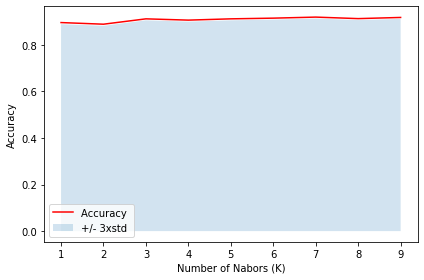

In [ ]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, alpha=0.2)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# Pengambilan keputusan nilai K dan Accuracy terbaik

In [ ]:
print("The best accuracy was with",mean_acc.max(),'with K = ',mean_acc.argmax()+1)

The best accuracy was with 0.9195 with K =  7
